In [1]:
## Import All The tables from the Source ###
train=read.csv("/root/hackerday/02_walmart_1/train.csv")
test=read.csv("/root/hackerday/02_walmart_1/test.csv")
stores=read.csv("/root/hackerday/02_walmart_1/stores.csv")
features=read.csv("/root/hackerday/02_walmart_1/features.csv")
sampleSubmission=read.csv("/root/hackerday/02_walmart_1/sampleSubmission.csv")

In [5]:
train$Str_dept=paste(train$Store,train$Dept,sep="_")
test$Str_dept=paste(test$Store,test$Dept,sep="_")
head(train)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Str_dept
1,1,1,2010-02-05,24924.5,FALSE,1_1
2,1,1,2010-02-12,46039.49,TRUE,1_1
3,1,1,2010-02-19,41595.55,FALSE,1_1
4,1,1,2010-02-26,19403.54,FALSE,1_1
5,1,1,2010-03-05,21827.9,FALSE,1_1
6,1,1,2010-03-12,21043.39,FALSE,1_1


In [7]:
train_store_dept_11=train[train$Str_dept=="1_1",]
test_store_dept_11=test[test$Str_dept=="1_1",]

In [11]:
#head(train_store_dept_11)
dim(train_store_dept_11)
dim(test_store_dept_11)



[1] 143   6

[1] 39  5

In [33]:
myts <- ts(train_store_dept_11$Weekly_Sales,frequency=52) ## Holwinter
fit=HoltWinters(myts, beta = F,gamma=FALSE)  ## Holwinter

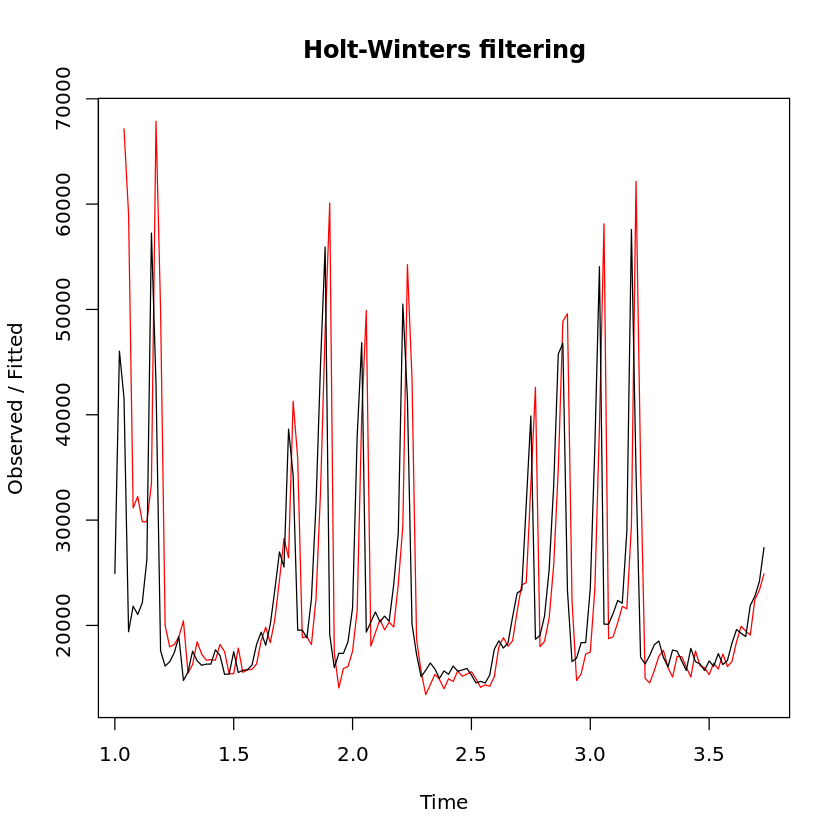

In [34]:
plot(fit)

In [21]:
library(forecast)
myts <- ts(train_store_dept_11$Weekly_Sales,frequency=52)
#plot(myts)
fit <- stlf(myts, s.window="period",method="arima")
#summary(fit)

Warning message:
In auto.arima(x, xreg = xreg, seasonal = FALSE, ...): Unable to fit final model using maximum likelihood. AIC value approximated

In [24]:
#plot(fit)
summary(fit)


Forecast method: STL +  ARIMA(2,0,3) with non-zero mean

Model Information:
Series: x 
ARIMA(2,0,3) with non-zero mean 

Coefficients:
         ar1    ar2      ma1      ma2      ma3   intercept
      0.4052  0.005  -0.0793  -0.4958  -0.3354  22752.4021
s.e.  0.2841  0.235   0.2554   0.1859   0.1428     59.9272

sigma^2 estimated as 14115502:  log likelihood=-1380
AIC=2774.12   AICc=2774.95   BIC=2794.86

Error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE       ACF1
Training set -122.752 3730.695 2143.679 -1.702907 9.081109 0.5144153 0.03598659

Forecasts:
         Point Forecast     Lo 80    Hi 80     Lo 95    Hi 95
3.750000       34359.86 29544.991 39174.73 26996.154 41723.56
3.769231       19477.10 14412.977 24541.23 11732.191 27222.01
3.788462       20837.79 15487.217 26188.35 12654.797 29020.77
3.807692       20474.53 14647.900 26301.16 11563.468 29385.59
3.826923       24142.30 18239.815 30044.78 15115.229 33169.37
3.846154       32481.07 26565.4

In [28]:
store_dept_key_test=unique(test$Str_dept)
store_dept_key_train=unique(train$Str_dept)
common_key=intersect(store_dept_key_test,store_dept_key_train)
head(common_key)
length(common_key)

[1] "1_1" "1_2" "1_3" "1_4" "1_5" "1_6"

[1] 3158

In [29]:
op_all=c()

for(i in 1:length(common_key))
{
  store_dept_sub_train<-train[train$Str_dept==common_key[i],c("Weekly_Sales","Date")]
  store_dept_sub_test<-test[test$Str_dept==common_key[i],]
  
  myts <- ts(store_dept_sub_train$Weekly_Sales,frequency=52)
  
  lead_time=nrow(store_dept_sub_test)
  fit <- try(stlf(myts, s.window="period",h=lead_time,method="arima"),silent = T)
  #summary(fit)
  #plot(fit)
  #fit[[4]]
  pred<-try(as.numeric(fit[[4]]),silent = T)
  store_dept_sub_test$Weekly_Sales=pred
  store_dept_sub_test$Id=paste(store_dept_sub_test$Str_dept,store_dept_sub_test$Date,sep="_")
  
  op=store_dept_sub_test[,c("Id","Weekly_Sales")]
  op_all=rbind(op_all,op)
  #print(i)
}


Warning message:
In auto.arima(x, xreg = xreg, seasonal = FALSE, ...): Unable to fit final model using maximum likelihood. AIC value approximatedWarning message:
In auto.arima(x, xreg = xreg, seasonal = FALSE, ...): Unable to fit final model using maximum likelihood. AIC value approximatedWarning message:
In auto.arima(x, xreg = xreg, seasonal = FALSE, ...): Unable to fit final model using maximum likelihood. AIC value approximatedWarning message:
In auto.arima(x, xreg = xreg, seasonal = FALSE, ...): Unable to fit final model using maximum likelihood. AIC value approximatedWarning message:
In auto.arima(x, xreg = xreg, seasonal = FALSE, ...): Unable to fit final model using maximum likelihood. AIC value approximatedWarning message:
In auto.arima(x, xreg = xreg, seasonal = FALSE, ...): Unable to fit final model using maximum likelihood. AIC value approximatedWarning message:
In auto.arima(x, xreg = xreg, seasonal = FALSE, ...): Unable to fit final model using maximum likelihood. AIC val

In [30]:
op_all_1=op_all[op_all$Weekly_Sales!="Error in fit[[4]] : subscript out of bounds\n",]

sampleSubmission3=merge(subm1,op_all_1,by="Id",all.x = TRUE)
sum(is.na(sampleSubmission3$Weekly_Sales.y))

sampleSubmission3$Weekly_Sales=ifelse(is.na(sampleSubmission3$Weekly_Sales.y),sampleSubmission3$Weekly_Sales.x,sampleSubmission3$Weekly_Sales.y)


ERROR: Error in merge(sampleSubmission2, op_all_1, by = "Id", all.x = TRUE): object 'sampleSubmission2' not found


ERROR: Error in eval(expr, envir, enclos): object 'sampleSubmission3' not found


ERROR: Error in ifelse(is.na(sampleSubmission3$Weekly_Sales.y), sampleSubmission3$Weekly_Sales.x, : object 'sampleSubmission3' not found


In [ ]:
sum(is.na(sampleSubmission3$Weekly_Sales))

STLF_sub=sampleSubmission3[,c("Id","Weekly_Sales")]

write.csv(STLF_sub,file="ARIMA_using_stlf_stepwise.csv",row.names=F)
